In [ ]:
import pandas as pd
import numpy as np

In [131]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [133]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [134]:
df.drop(['passenger_id','name','ticket','cabin','boat','body','home.dest','sibsp','embarked','parch'],axis=1,inplace=True)

In [135]:
df.isnull().sum()

pclass        0
sex           0
age         174
fare          1
survived      0
dtype: int64

In [136]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\Abid.MD\AppData\Local\Temp\ipykernel_13020\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [137]:
df.dropna(inplace=True)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       109
           1       0.69      0.59      0.64        61

    accuracy                           0.76       170
   macro avg       0.74      0.72      0.73       170
weighted avg       0.75      0.76      0.75       170



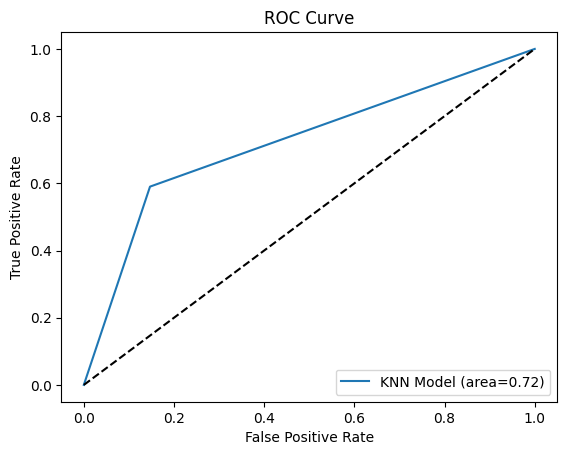

AUC: 0.7216874718002707


In [138]:
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
X=df.drop('survived',axis=1)
y=df['survived']
X=pd.get_dummies(X,drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.metrics import auc,roc_curve,roc_auc_score
model=KNeighborsClassifier(n_neighbors=17)


model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

fpr,tpr,thresholds=roc_curve(y_test,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="KNN Model (area=%0.2f)" % roc_auc_score(y_test,y_pred))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
print("AUC:",roc_auc_score(y_test,y_pred))


In [139]:
correlations = df.corr(numeric_only=True)['survived'].sort_values(ascending=False)
print(correlations)


survived    1.000000
fare        0.251249
age        -0.036542
pclass     -0.328870
Name: survived, dtype: float64


In [140]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features
print(importances.head(10))

fare        0.341338
age         0.292089
sex_male    0.260908
pclass      0.105665
dtype: float64


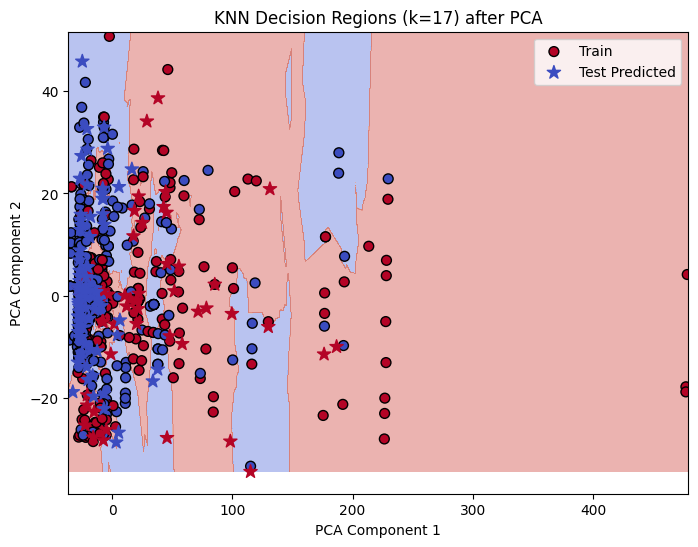

In [141]:
# ====== Visualizing the KNN decision boundaries ======
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN again on PCA-reduced data
model_pca = KNeighborsClassifier(n_neighbors=n)
model_pca.fit(X_train_pca, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each grid point
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and clusters
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', s=50, cmap='coolwarm', label='Train')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, marker='*', s=100, cmap='coolwarm', label='Test Predicted')
plt.title(f'KNN Decision Regions (k={17}) after PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
